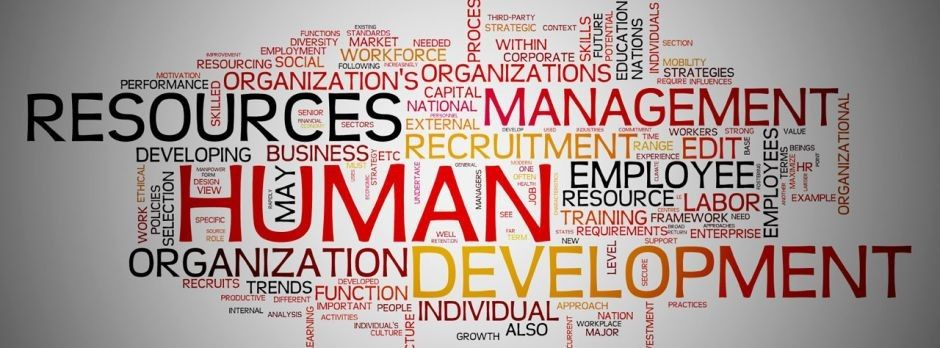

# Answer these questions using the libraries Pandas and Numpy.

## Numpy & Pandas

1-How many rows and columns are there in the dataset?

2-What are the unique values in the 'department' column?

3-How many unique regions are covered in the dataset?

4-What are the different levels of education among the employees?

5-How many male and female employees are there in the dataset?

6-What are the different recruitment channels used by the company?

7-What is the maximum number of trainings attended by an employee?

8-What is the average age of employees in the dataset?

9-What is the maximum length of service among the employees?

10-What percentage of employees in the dataset were actually promoted?

11-What is the average age of promoted employees compared to non-promoted ones?

12-How does the average training score differ between promoted and non-promoted employees?

13-What is the average length of service for promoted employees?

14-What is the proportion of employees who have won awards among promoted employees?

15-Is there a correlation between KPIs met >80% and promotion?

16-What is the correlation between the number of trainings attended and promotion?

17-How does the length of service correlate with the average training score?

18-Is there any correlation between age and the number of trainings attended?

19-How can you group the data by department and calculate the average age for each department?

20-What is the total number of trainings attended by employees in each region?

## Visualization quiz 

1-What is the distribution of employees by department? Histogram

2-How does the distribution of promotions vary across different regions? Histogram

3-Is there a difference in the average training scores between promoted and non-promoted employees? scatter

4-How does the distribution of ages differ for promoted and non-promoted employees? line

5-What is the relationship between the length of service and the likelihood of getting promoted? scatter

6-Are employees with higher KPIs (>80%) more likely to get promoted? barplot

7-Is there a significant difference in the average training scores for employees who received awards? barplot

8-How does the distribution of previous year ratings vary between promoted and non-promoted employees? scatter

9-What is the distribution of the number of trainings taken by employees? Histogram

10-How is the gender distribution within different departments? scatter + hue

11-What is the most common recruitment channel used by employees in different departments? bar

12-Are there any patterns between education level and the likelihood of promotion? scatter

13-How does the age distribution vary between different recruitment channels? hist

14-What is the average age of employees in different departments? 

15-What is the correlation between average training scores and previous year ratings? heatmap

16-Are there any outliers in the length of service? boxplot

17-How does the distribution of promotions change based on the number of trainings taken? hist 

18-Is there a difference in promotions for male and female employees? scatter + hue

19-What is the proportion of promoted employees in each department? bie

20-How does the distribution of promotions change based on the age groups of employees? catplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## data cleaning & exploration

In [3]:
df.shape

(54808, 14)

In [4]:
df = df.drop_duplicates()
df.shape

(54808, 14)

no duplcated values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 6.3+ MB


In [6]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
pd.set_option('display.max_rows', 54808)

Check the education levels with the age to choose the best way to fill null values

In [8]:
null_edu = df.loc[:, ['education',  'age']]

In [9]:
df['education'] = df['education'].fillna(df['education'].mode().iloc[0])

filled null values in the education column with the mode

In [10]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 6.3+ MB


In [12]:
df = df.dropna()

In [13]:
df.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [14]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

Cleaning cols names

In [15]:
df.rename(columns={'KPIs_met >80%': 'KPI>80%', 
                  'awards_won?': 'awards_won'}, inplace= True)

In [16]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI>80%', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

## analysis

In [17]:
## 1-How many rows and columns are there in the dataset?
df.shape

(50684, 14)

In [18]:
## 2-What are the unique values in the 'department' column?
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [19]:
## 3-How many unique regions are covered in the dataset?
df.region.nunique()

34

In [20]:
## 4-What are the different levels of education among the employees?
df.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [21]:
## 5-How many male and female employees are there in the dataset?
df.gender.value_counts()

m    35530
f    15154
Name: gender, dtype: int64

In [22]:
## 6-What are the different recruitment channels used by the company?
df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [23]:
## 7-What is the maximum number of trainings attended by an employee?

df.no_of_trainings.max()

10

In [24]:
##8-What is the average age of employees in the dataset?
round(df.age.mean(),1)

35.4

In [25]:
## 9-What is the maximum length of service among the employees?
df.length_of_service.max()

37

In [26]:
## 10-What percentage of employees in the dataset were actually promoted?
df.is_promoted.value_counts(normalize=True)
## 91.4% is not promoted - 8.6% is promoted

0    0.914588
1    0.085412
Name: is_promoted, dtype: float64

In [27]:
## 11-What is the average age of promoted employees compared to non-promoted ones?
promoted = df[df['is_promoted']==0]
non_promoted = df[df['is_promoted']==1]
print(f'promoted average ages is {promoted.age.mean()}\nnon promoted average ages is {non_promoted.age.mean()}')

promoted average ages is 35.49668859885665
non promoted average ages is 34.94063294063294


In [28]:
## 12-How does the average training score differ between promoted and non-promoted employees?
print(f'promoted average training score is {promoted.avg_training_score.mean()}\nnon promoted average training score is {non_promoted.avg_training_score.mean()}')

promoted average training score is 62.65242152950059
non promoted average training score is 71.27789327789328


In [29]:
## 13-What is the average length of service for promoted employees?
print(f'promoted average length of service is {promoted.length_of_service.mean()}')

promoted average length of service is 6.277812533707259


In [30]:
## 14-What is the proportion of employees who have won awards among promoted employees?
promoted['awards_won'].value_counts(normalize=True)[1]

0.014086937762916621

In [31]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI>80%', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [32]:
## 15-Is there a correlation between KPIs met >80% and promotion?
df['KPI>80%'].corr(df.is_promoted)
## yes it's a weak positive correlation where the values of both variables tend to increase or decrease together.

0.22161369479125473

In [33]:
## 16-What is the correlation between the number of trainings attended and promotion?
df['no_of_trainings'].corr(df.is_promoted)
## no correlation between them

-0.024717204646970713

In [34]:
## 17-How does the length of service correlate with the average training score?
df['length_of_service'].corr(df.avg_training_score)
## no correlation between them

-0.04226047070721108

In [35]:
## 18-Is there any correlation between age and the number of trainings attended?
df['age'].corr(df.no_of_trainings)
## no correlation between them

-0.08154273272216854

In [36]:
##19-How can you group the data by department and calculate the average age for each department?
df.groupby('department')['age'].mean()

department
Analytics            32.907900
Finance              32.731025
HR                   35.343002
Legal                34.939150
Operations           36.570446
Procurement          36.465941
R&D                  33.223684
Sales & Marketing    35.561852
Technology           35.541717
Name: age, dtype: float64

In [37]:
## 20-What is the total number of trainings attended by employees in each region?
df.groupby('region')['no_of_trainings'].sum()

region
region_1       653
region_10      729
region_11     1431
region_12      500
region_13     2955
region_14      883
region_15     3314
region_16     1597
region_17      845
region_18       24
region_19     1012
region_2     14980
region_20      933
region_21      457
region_22     7891
region_23     1402
region_24      571
region_25      927
region_26     2442
region_27     1868
region_28     1549
region_29     1067
region_3       372
region_30      709
region_31     2233
region_32     1030
region_33      290
region_34      302
region_4      1926
region_5       830
region_6       688
region_7      5769
region_8       630
region_9       463
Name: no_of_trainings, dtype: int64

In [38]:
corr = df.corr()

C:\Users\HASSAN\AppData\Local\Temp\ipykernel_492\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [39]:
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI>80%,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005912,0.000621,0.004533,0.002121,0.000488,0.009766,0.000155,0.002808
no_of_trainings,-0.005912,1.000000,-0.081543,-0.063126,-0.054221,-0.044941,-0.008430,0.044433,-0.024717
age,0.000621,-0.081543,1.000000,0.006008,0.624250,-0.029920,-0.010419,-0.056744,-0.020528
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.002121,-0.054221,0.624250,0.000253,1.000000,-0.085926,-0.043846,-0.042260,-0.012803
KPI>80%,0.000488,-0.044941,-0.029920,0.351578,-0.085926,1.000000,0.096542,0.078960,0.221614
awards_won,0.009766,-0.008430,-0.010419,0.027738,-0.043846,0.096542,1.000000,0.072567,0.197446
avg_training_score,0.000155,0.044433,-0.056744,0.075139,-0.042260,0.078960,0.072567,1.000000,0.180771
is_promoted,0.002808,-0.024717,-0.020528,0.159320,-0.012803,0.221614,0.197446,0.180771,1.000000


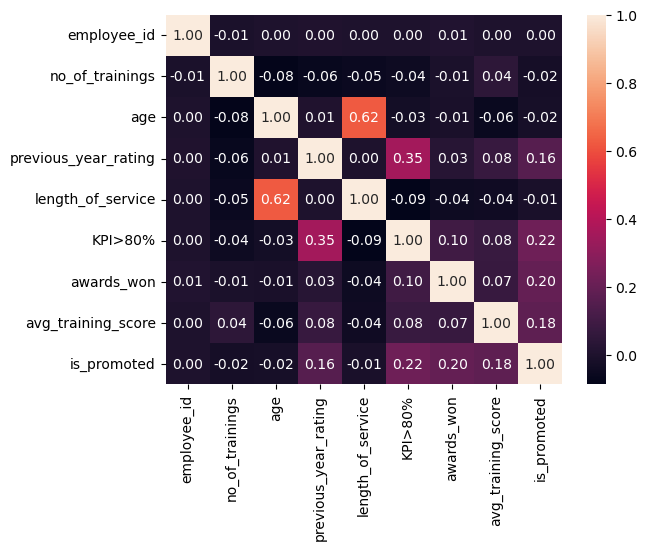

<Figure size 400x500 with 0 Axes>

In [40]:
sns.heatmap(corr,annot=True,fmt='.2f')
plt.figure(figsize=(4,5))
plt.show()

# Visualizations 

### 1-What is the distribution of employees by department? 

In [41]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI>80%', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [42]:
df.department.value_counts()

Sales & Marketing    15529
Operations           10760
Procurement           6709
Technology            6592
Analytics             4886
Finance               2253
HR                    2172
R&D                    912
Legal                  871
Name: department, dtype: int64

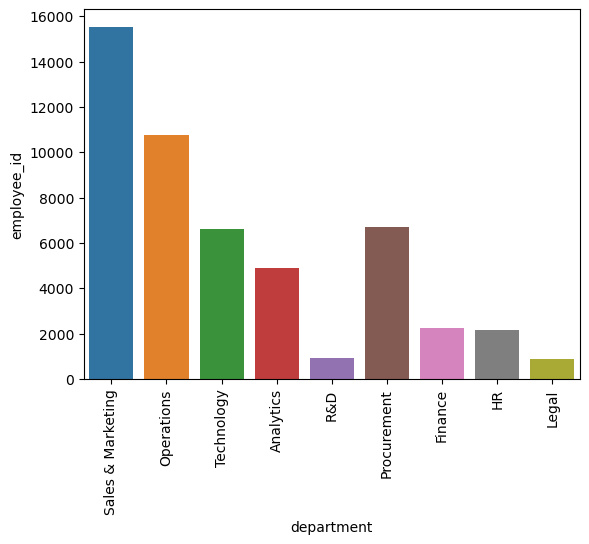

In [43]:
sns.barplot(x='department', y='employee_id', data = df, errorbar=None,estimator='count')
plt.xticks(rotation=90)
plt.show()

### 2-How does the distribution of promotions vary across different regions?

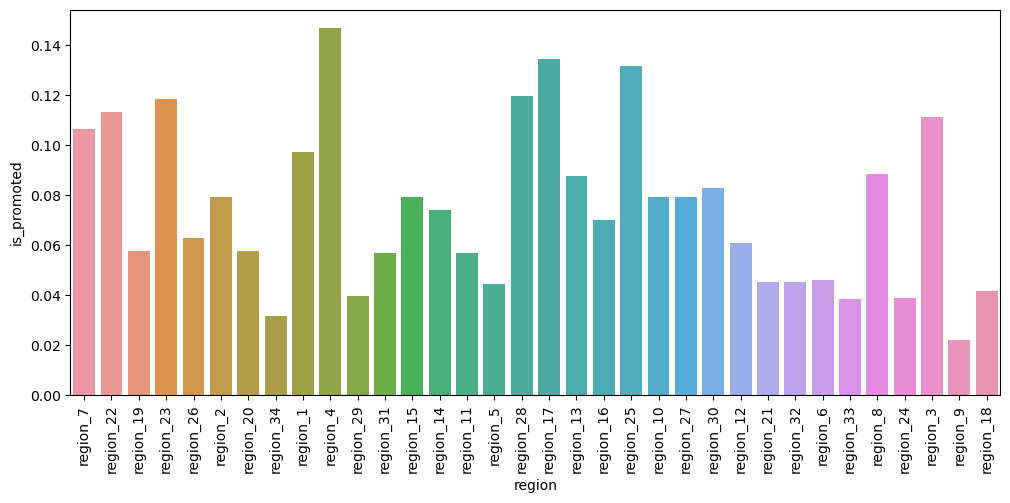

In [44]:
plt.figure(figsize=(12,5))
sns.barplot(x='region', y='is_promoted', data = df, errorbar=None)
plt.xticks(rotation=90)
plt.show()

### 3-Is there a difference in the average training scores between promoted and non-promoted employees?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


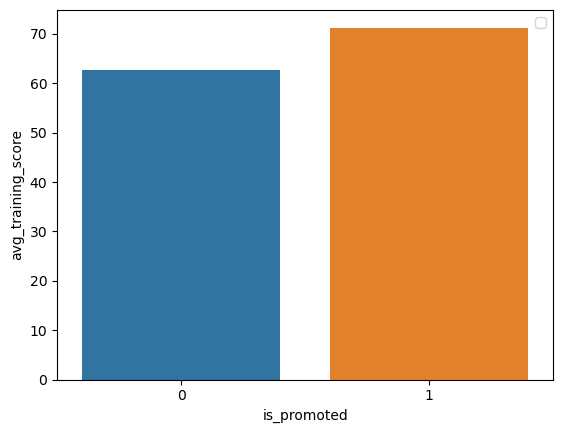

In [45]:
sns.barplot(x='is_promoted', y='avg_training_score', data = df, errorbar=None)
plt.legend()
plt.show()

### 4-How does the distribution of ages differ for promoted and non-promoted employees? 

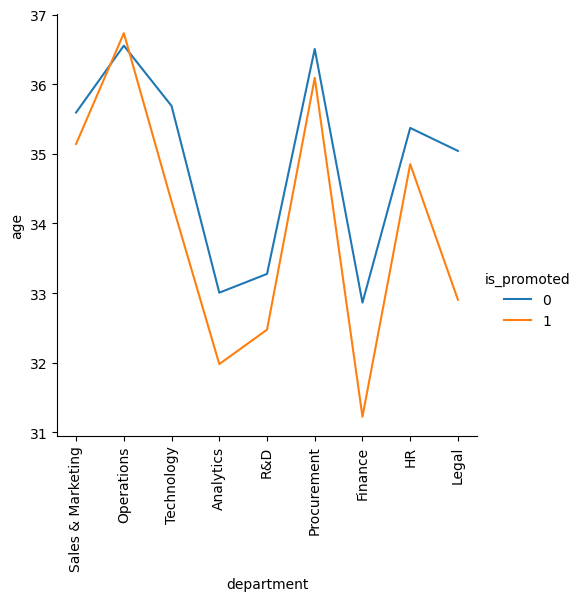

In [46]:
sns.relplot(x='department',hue='is_promoted', y='age', data=df, kind='line', errorbar=None)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='is_promoted', ylabel='age'>

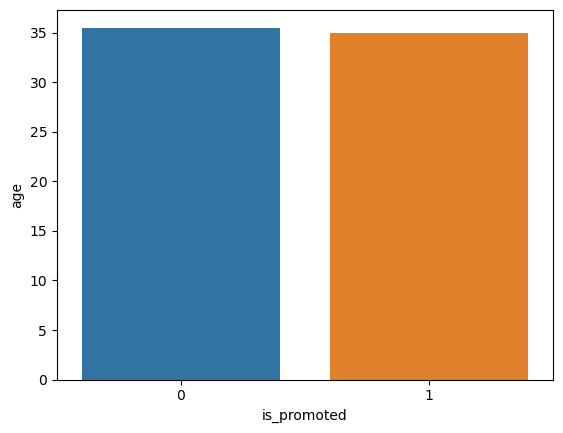

In [47]:
sns.barplot(x='is_promoted', y='age', data=df,errorbar=None)

### 5-What is the relationship between the length of service and the likelihood of getting promoted? 


In [48]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI>80%', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

<Axes: xlabel='is_promoted', ylabel='length_of_service'>

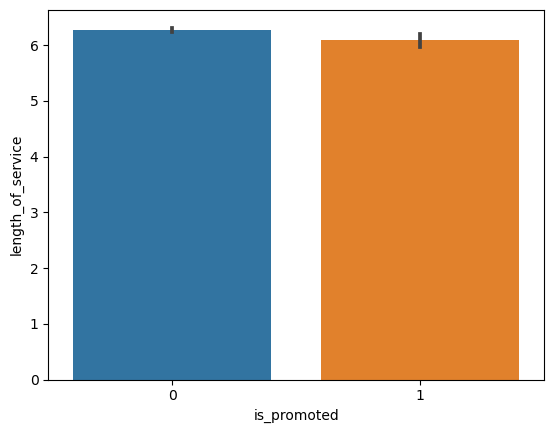

In [49]:
sns.barplot(
            x='is_promoted',y='length_of_service', data=df)

In [50]:
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI>80%,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005912,0.000621,0.004533,0.002121,0.000488,0.009766,0.000155,0.002808
no_of_trainings,-0.005912,1.000000,-0.081543,-0.063126,-0.054221,-0.044941,-0.008430,0.044433,-0.024717
age,0.000621,-0.081543,1.000000,0.006008,0.624250,-0.029920,-0.010419,-0.056744,-0.020528
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.002121,-0.054221,0.624250,0.000253,1.000000,-0.085926,-0.043846,-0.042260,-0.012803
KPI>80%,0.000488,-0.044941,-0.029920,0.351578,-0.085926,1.000000,0.096542,0.078960,0.221614
awards_won,0.009766,-0.008430,-0.010419,0.027738,-0.043846,0.096542,1.000000,0.072567,0.197446
avg_training_score,0.000155,0.044433,-0.056744,0.075139,-0.042260,0.078960,0.072567,1.000000,0.180771
is_promoted,0.002808,-0.024717,-0.020528,0.159320,-0.012803,0.221614,0.197446,0.180771,1.000000


there is no relation between them

### 6-Are employees with higher KPIs (>80%) more likely to get promoted?

<Axes: xlabel='is_promoted', ylabel='KPI>80%'>

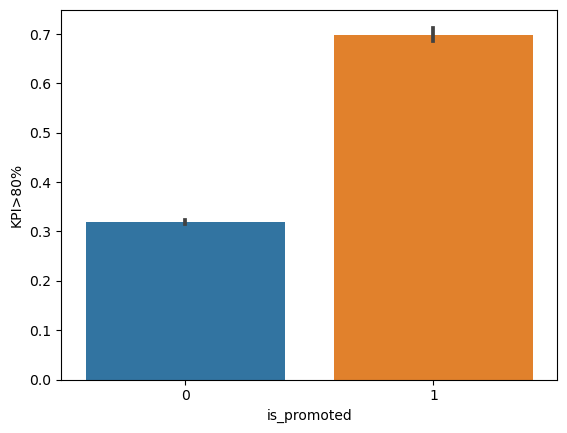

In [51]:
sns.barplot(x='is_promoted', y='KPI>80%', data=df)

yes the employees with the higher kpi's more likely to get promoted

### 7-Is there a significant difference in the average training scores for employees who received awards?


In [52]:
awared=df.awards_won.value_counts()
label = ['No', 'Won']

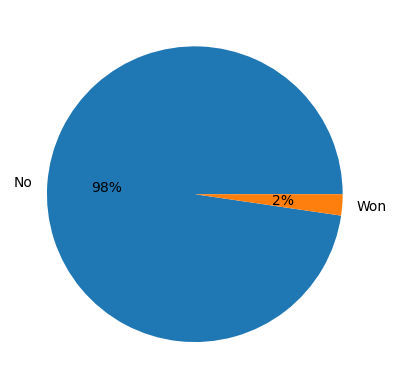

In [53]:
plt.pie(awared, labels=label, autopct='%.0f%%')
plt.show()

### 8-How does the distribution of previous year ratings vary between promoted and non-promoted employees?

<Axes: xlabel='is_promoted', ylabel='previous_year_rating'>

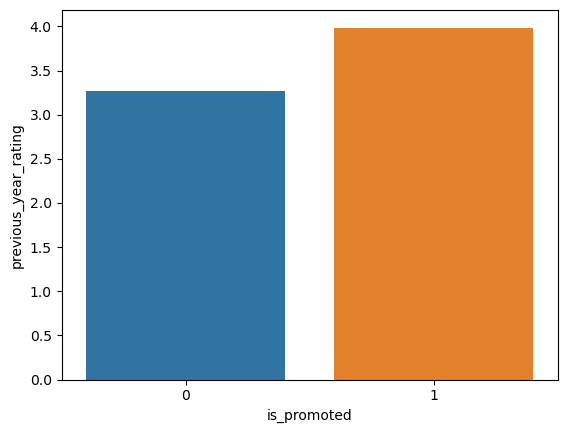

In [54]:
sns.barplot(x='is_promoted', y='previous_year_rating', data=df, errorbar=None)

### 9-What is the distribution of the number of trainings taken by employees?

<Axes: xlabel='no_of_trainings', ylabel='employee_id'>

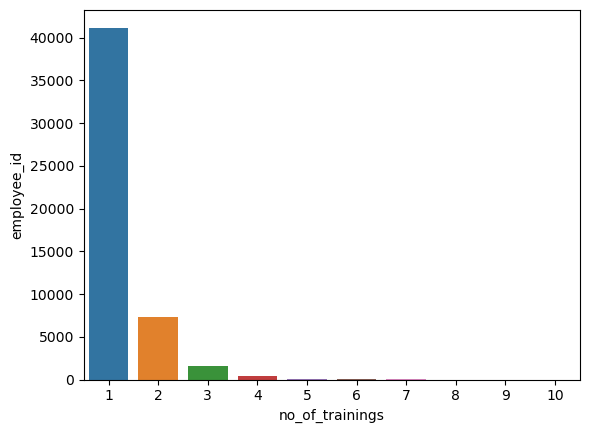

In [55]:
sns.barplot(x='no_of_trainings', y='employee_id', data=df, errorbar=None, estimator='count')

In [56]:
training= df.groupby('no_of_trainings')['employee_id'].count()
training

no_of_trainings
1     41160
2      7324
3      1614
4       411
5       119
6        34
7        10
8         4
9         3
10        5
Name: employee_id, dtype: int64

In [57]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI>80%', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [58]:
df.shape

(50684, 14)

In [59]:
df.drop(columns= 'employees', axis=0, inplace=True)

KeyError: "['employees'] not found in axis"

### 10-How is the gender distribution within different departments?

In [ ]:
sns.displot(df, x="department", hue="gender", multiple="dodge")
plt.xticks(rotation=90)
plt.show()

### 11-What is the most common recruitment channel used by employees in different departments? 

In [ ]:
df.columns

In [ ]:
df.head()

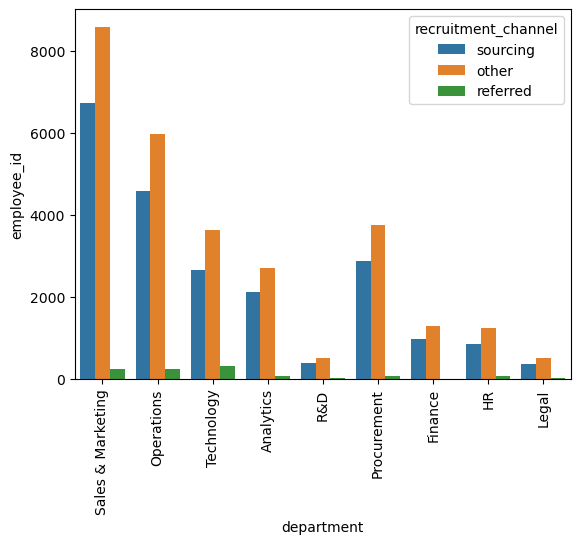

In [60]:
sns.barplot(hue='recruitment_channel', y='employee_id', data=df, errorbar=None, estimator='count', x='department')
plt.xticks(rotation=90)
plt.show()

In [61]:
df.recruitment_channel.value_counts(ascending=False)

other       28185
sourcing    21472
referred     1027
Name: recruitment_channel, dtype: int64

the most Channel is: other

### 12-Are there any patterns between education level and the likelihood of promotion? 

<Axes: xlabel='education', ylabel='is_promoted'>

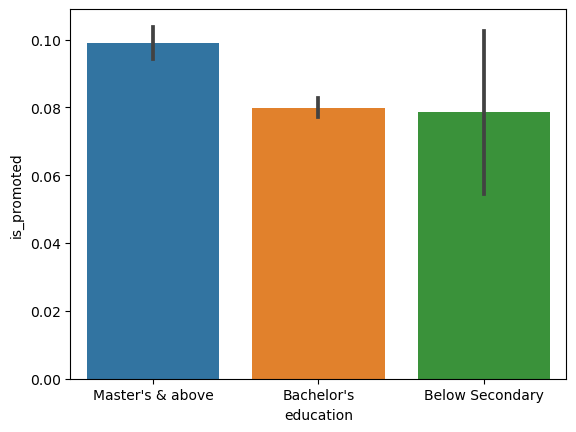

In [62]:
sns.barplot(y='is_promoted', x='education', data=df)

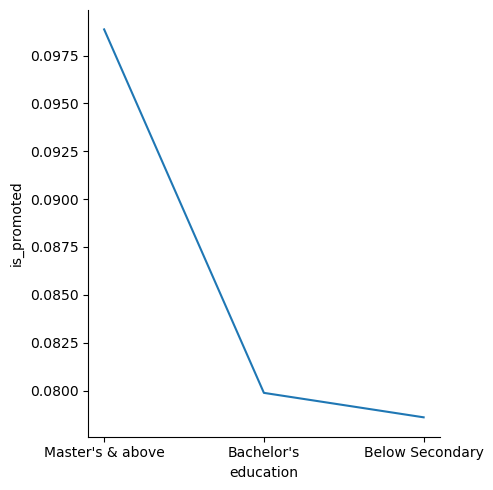

In [63]:
sns.relplot(y='is_promoted', x='education', data=df, kind='line',errorbar=None)

no relation between them

### 13-How does the age distribution vary between different recruitment channels? 

<Axes: xlabel='recruitment_channel', ylabel='age'>

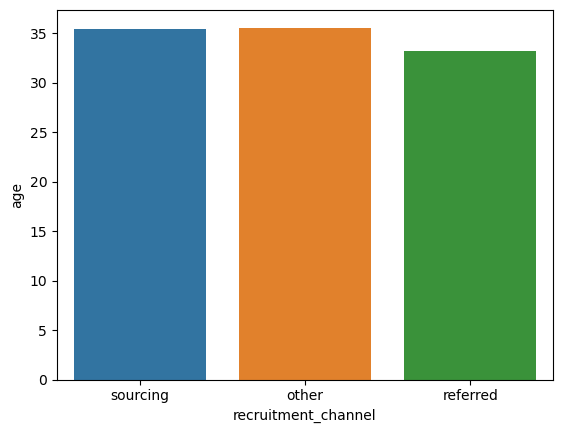

In [64]:
sns.barplot(x='recruitment_channel', y='age', data=df, errorbar=None)

### 14-What is the average age of employees in different departments?

In [65]:
round(df.groupby('department')['age'].mean(),0)

department
Analytics            33.0
Finance              33.0
HR                   35.0
Legal                35.0
Operations           37.0
Procurement          36.0
R&D                  33.0
Sales & Marketing    36.0
Technology           36.0
Name: age, dtype: float64

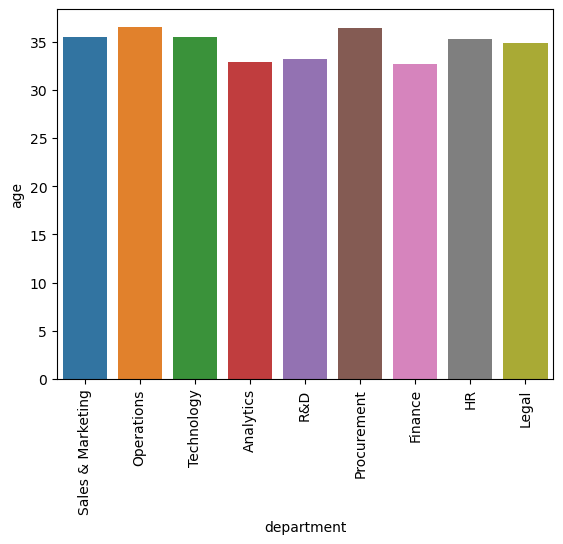

In [66]:
sns.barplot(x='department', y='age', estimator='mean', data=df, errorbar=None)
plt.xticks(rotation=90)
plt.show()

### 15-What is the correlation between average training scores and previous year ratings? 

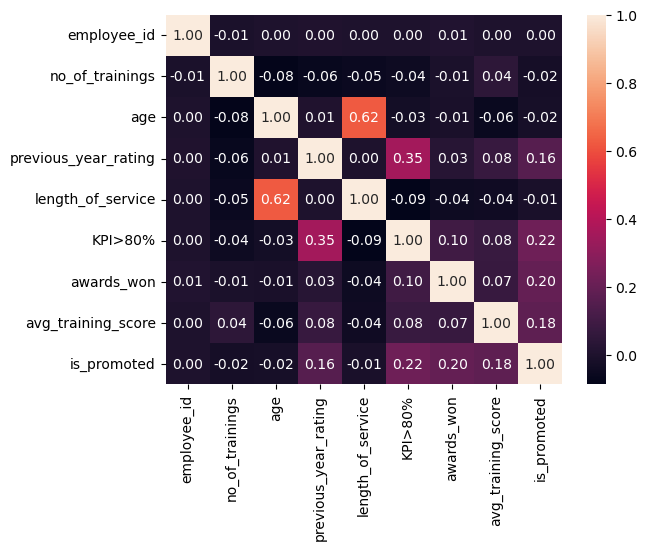

<Figure size 400x500 with 0 Axes>

In [67]:
sns.heatmap(corr,annot=True,fmt='.2f')
plt.figure(figsize=(4,5))
plt.show()

### 16-Are there any outliers in the length of service? 

<Axes: ylabel='length_of_service'>

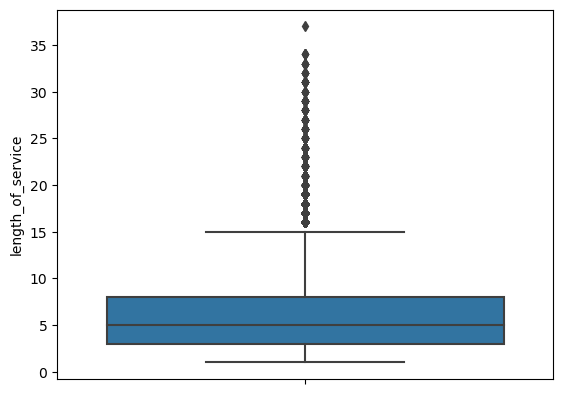

In [68]:
sns.boxplot(y='length_of_service', data=df)

In [69]:
df.length_of_service.value_counts(ascending=False)

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
1      423
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In [70]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI>80%', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

yes the normal range between 1 year to 13 year 
and the rest are outlier

### 17-How does the distribution of promotions change based on the number of trainings taken? 

<Axes: xlabel='no_of_trainings', ylabel='count'>

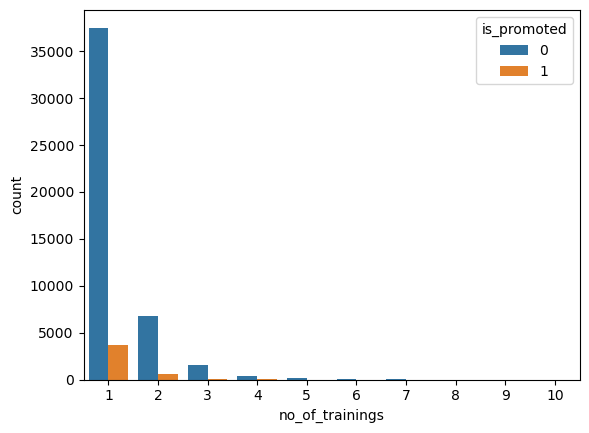

In [71]:
sns.countplot(x='no_of_trainings',hue='is_promoted', data=df)

### 18-Is there a difference in promotions for male and female employees?

<Axes: xlabel='is_promoted', ylabel='count'>

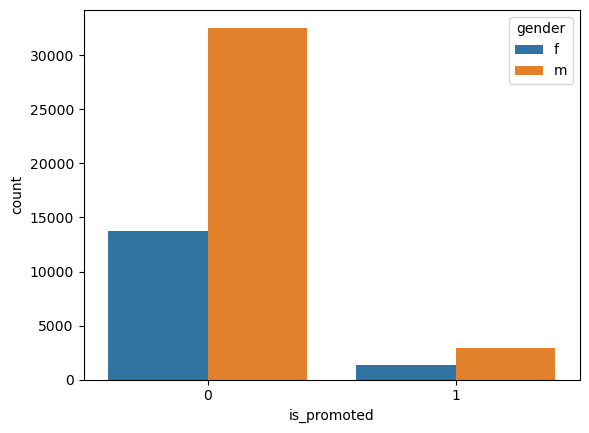

In [72]:
sns.countplot(x='is_promoted',hue='gender', data=df)

In [73]:
df.groupby('is_promoted')['gender'].value_counts()

is_promoted  gender
0            m         32576
             f         13779
1            m          2954
             f          1375
Name: gender, dtype: int64

### 19-What is the proportion of promoted employees in each department? 

In [74]:
dep = df.department.value_counts()
dep

Sales & Marketing    15529
Operations           10760
Procurement           6709
Technology            6592
Analytics             4886
Finance               2253
HR                    2172
R&D                    912
Legal                  871
Name: department, dtype: int64

In [75]:
pro = df.groupby('department')['is_promoted'].count()
pro

department
Analytics             4886
Finance               2253
HR                    2172
Legal                  871
Operations           10760
Procurement           6709
R&D                    912
Sales & Marketing    15529
Technology            6592
Name: is_promoted, dtype: int64

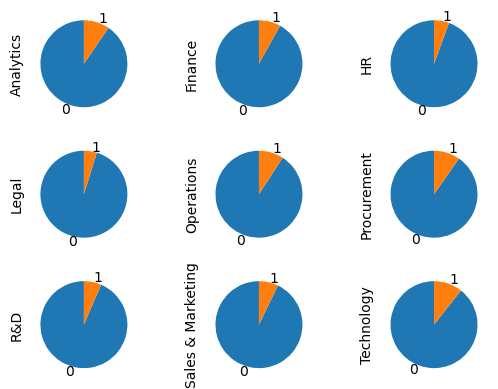

In [76]:
fig, ax = plt.subplots(3,3)
ax = ax.flatten()
tab = pd.crosstab(df['department'],df['is_promoted'])
for i,x in enumerate(tab.index):
    tab.loc[x].plot.pie(ax=ax[i],startangle=90)


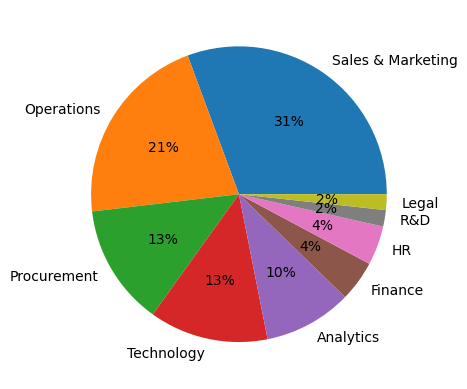

In [77]:
plt.pie(dep,labels=dep.index, autopct='%.0f%%')
plt.show()

### 20-How does the distribution of promotions change based on the age groups of employees?

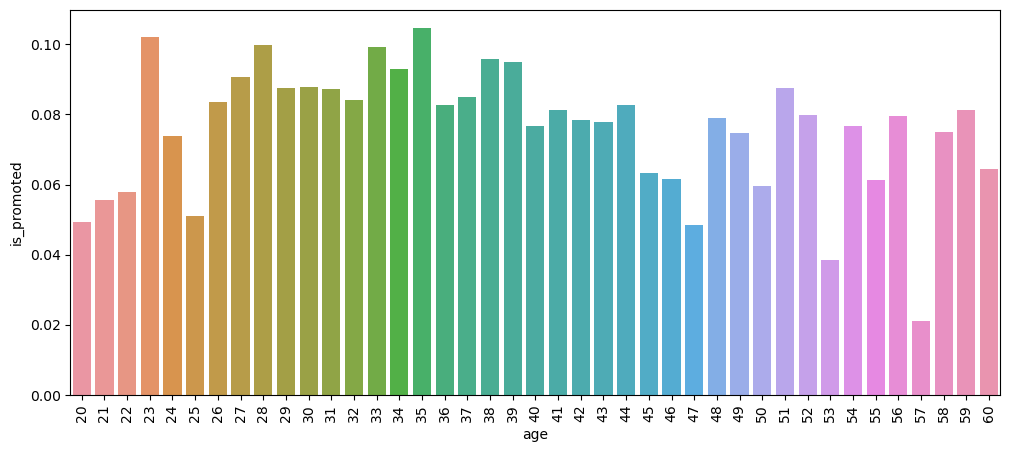

In [78]:
plt.figure(figsize=(12,5))
sns.barplot(df, x="age", y="is_promoted", errorbar=None)
plt.xticks(rotation=90)
plt.show()